In [179]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv('log.csv')
df.head()

,cycle,mode,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,...,opp_player_4_kick,opp_player_4_dist,opp_player_4_area,opp_player_5_x,opp_player_5_y,opp_player_5_vx,opp_player_5_vy,opp_player_5_kick,opp_player_5_dist,opp_player_5_area
0,693,play_on,-25.4260,-18.3103,-1.8574,0.1634,1,-39.3941,-4.6282,0.0311,...,0,28.357855,0,-20.0719,-27.9129,-0.1881,0.1216,0,30.257638,0
1,694,play_on,-27.2876,-18.1470,-1.7499,0.1535,1,-39.5709,-5.1420,-0.0707,...,0,27.538148,0,-20.6643,-27.5485,-0.1989,0.1224,0,29.317414,0
2,695,play_on,-29.0081,-17.9264,-1.6173,0.2074,1,-39.7623,-5.8568,-0.0766,...,0,26.913757,0,-21.3668,-27.1998,-0.2359,0.1171,0,28.176552,0
3,696,play_on,-30.6820,-17.6790,-1.5735,0.2325,1,-40.0416,-6.6899,-0.1117,...,0,26.851640,0,-22.0475,-26.7885,-0.2286,0.1381,0,26.976682,0
4,697,play_on,-32.2676,-17.4541,-1.4904,0.2115,1,-40.2687,-7.6518,-0.0908,...,0,25.629512,0,-25.3030,14.6713,-0.1458,-0.3770,0,26.875509,1


one-hot encode the mode column

In [181]:
df = pd.get_dummies(df, columns=['mode']).astype('float32')
df = df.astype('float32')
df = df.drop('cycle', axis=1)
df.head()

,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,my_vy,my_dash_power,...,mode_foul_charge_r,mode_free_kick_l,mode_free_kick_r,mode_goal_kick_l,mode_goal_r,mode_indirect_free_kick_r,mode_kick_in_l,mode_kick_in_r,mode_offside_r,mode_play_on
0,-25.426001,-18.310301,-1.8574,0.1634,1.0,-39.394100,-4.6282,0.0311,0.0169,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-27.287600,-18.146999,-1.7499,0.1535,1.0,-39.570900,-5.1420,-0.0707,-0.2055,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-29.008101,-17.926399,-1.6173,0.2074,1.0,-39.762299,-5.8568,-0.0766,-0.2859,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-30.681999,-17.679001,-1.5735,0.2325,1.0,-40.041599,-6.6899,-0.1117,-0.3332,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-32.267601,-17.454100,-1.4904,0.2115,1.0,-40.268700,-7.6518,-0.0908,-0.3848,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


normalize the data

In [182]:
for col in df.columns:
    if col != 'my_dash_power' and col != 'my_dash_dir' and col != 'my_turn':
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

split the data into train and test

In [183]:
train = df.sample(frac=0.8, random_state=200)

split the data into train and validation

In [184]:
validation = df.drop(train.index)
train.head()

,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,my_vy,my_dash_power,...,mode_foul_charge_r,mode_free_kick_l,mode_free_kick_r,mode_goal_kick_l,mode_goal_r,mode_indirect_free_kick_r,mode_kick_in_l,mode_kick_in_r,mode_offside_r,mode_play_on
63485,0.643466,0.316554,0.766439,0.234001,0.333333,0.147168,0.464222,0.574396,0.367541,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196402,0.910369,0.101878,0.596165,0.627788,0.333333,0.276007,0.380381,0.502596,0.498878,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
132038,0.114648,0.984108,0.497359,0.498894,0.666667,0.089716,0.638149,0.502596,0.498878,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229554,0.114648,0.984108,0.497359,0.498894,0.666667,0.097490,0.624023,0.502596,0.498878,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24586,0.823925,0.958747,0.407505,0.548940,0.333333,0.368785,0.629256,0.121698,0.455473,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


add layers to the model

In [185]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(len(df.columns) - 3,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='linear')
])

In [186]:
model.compile(optimizer='adam', loss='mse')

In [187]:
model.fit(train.drop(columns=['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), train.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']], epochs=100, validation_data=(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), validation.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']]))

Epoch 1/100
6029/6029 [==============================] - 13s 2ms/step - loss: 1452.7249 - val_loss: 1411.5336
Epoch 2/100
6029/6029 [==============================] - 10s 2ms/step - loss: 1402.3223 - val_loss: 1403.5830
Epoch 3/100
6029/6029 [==============================] - 10s 2ms/step - loss: 1388.2327 - val_loss: 1386.4081
Epoch 4/100
6029/6029 [==============================] - 10s 2ms/step - loss: 1380.9143 - val_loss: 1380.5146
Epoch 5/100
6029/6029 [==============================] - 10s 2ms/step - loss: 1376.7820 - val_loss: 1378.3131
Epoch 6/100
6029/6029 [==============================] - 10s 2ms/step - loss: 1373.4308 - val_loss: 1385.3672
Epoch 7/100
6029/6029 [==============================] - 10s 2ms/step - loss: 1370.0029 - val_loss: 1368.5580
Epoch 8/100
6029/6029 [==============================] - 10s 2ms/step - loss: 1366.7760 - val_loss: 1368.3485
Epoch 9/100
6029/6029 [==============================] - 10s 2ms/step - loss: 1363.1772 - val_loss: 1370.6801
Epoch 10/1

plot the loss

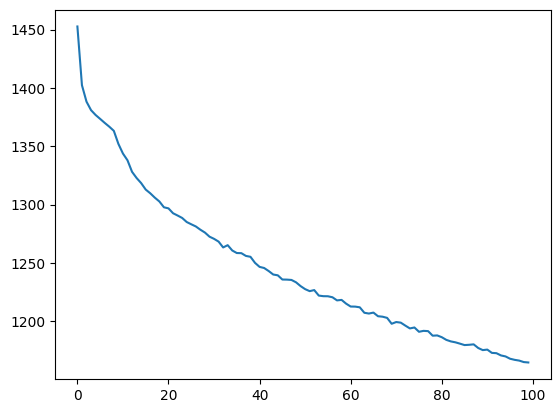

In [188]:
plt.plot(model.history.history['loss'])

plot the validation loss

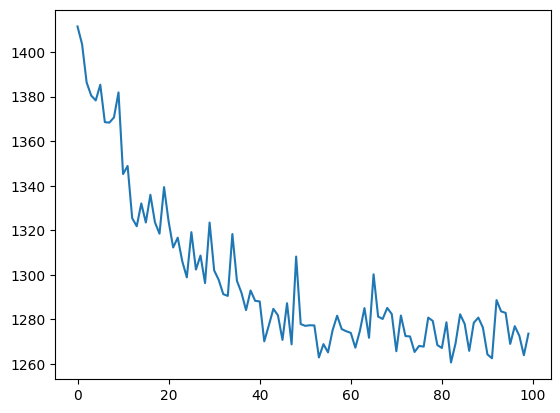

In [189]:
plt.plot(model.history.history['val_loss'])

In [190]:
model.save('model.h5')

/Users/hasan/Documents/final-project/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [191]:
model.evaluate(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), validation.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']])

1508/1508 [==============================] - 1s 638us/step - loss: 1273.5541


1273.5540771484375

In [241]:
result = model.predict(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1))

1508/1508 [==============================] - 1s 326us/step


In [243]:
result_df = pd.DataFrame(result, columns=['my_dash_power', 'my_dash_dir', 'my_turn'])

In [244]:
result_df.head(3)

,my_dash_power,my_dash_dir,my_turn
0,87.808815,-0.006646,-0.971444
1,97.032539,1.112755,-5.281590
2,73.655289,4.603970,-7.903185


save in result.csv

In [245]:
result_df.to_csv('result.csv', index=False)